In [84]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [85]:
import os

#move to current working directory so relative paths work
os.chdir('/Users/alisonlove/Bootcamp/19-cryptoclustering-challenge/Resources')


In [86]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [87]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [88]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [89]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df_market_scaled = scaler.fit_transform(df_market_data)


In [118]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_market_scaled, columns=df_market_data.columns)

# Copy the crypto names from the original data

# Set the coinid column as index
df_scaled = df_scaled.set_index(df_market_data.index)

# Display sample data to verify the DataFrame is correctly set up
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [91]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k values
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [92]:
# Create an empty list to store the inertia values
original_inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    
    # 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_scaled)
    
    # 3. Append the model.inertia_ to the inertia list
    original_inertia_values.append(kmeans.inertia_)

# After the loop, you can print the inertia values to check them
print(original_inertia_values)


[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120977, 65.302379141625, 54.7399219421002, 43.48160605008147, 37.517032490103574, 32.591890976724585, 28.22289929060893, 24.116198421409198]


In [93]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'Number of Clusters': k_values,
    'Inertia': original_inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

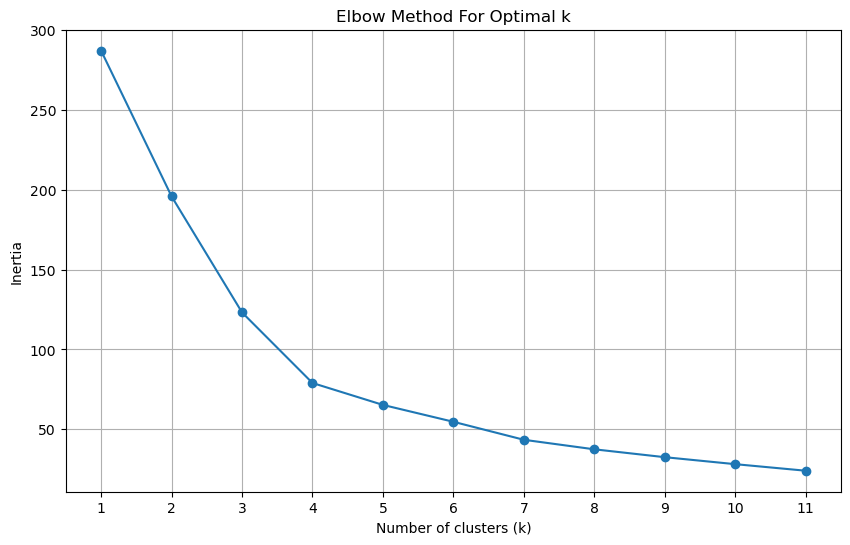

In [94]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_elbow['Number of Clusters'], df_elbow['Inertia'], marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Ensures that all k-values are used as x-ticks
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**

The elbow point in this set of points is not sharply defined but it seems that the inertia decreases significantly until k=4, after which the rate of decrease slows down. Between k=4 and k=5, there's a noticeable change in the slope of the line, indicating that additional clusters beyond this point do not contribute to a significant decrease in inertia. Therefore, the best value for k based on this elbow plot appears to be k=4. This would be the point after which adding more clusters doesn't yield as significant a reduction in inertia, implying that the additional complexity of more clusters might not be justified.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [95]:
# Initialize the K-Means model using the best value for k
# Best value for k
k = 4

# Initialize the K-Means model
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=42)



In [96]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [97]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print(cluster_labels)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [98]:
# Create a copy of the DataFrame
market_data = df_market_data.copy()

In [99]:
# Add a new column to the DataFrame with the predicted clusters
market_data['cluster'] = cluster_labels

# Display sample data
market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,2
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,2
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [100]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

import hvplot.pandas

# Create the scatter plot
scatter_plot = market_data.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='cluster',  # This will color the graph points by cluster
    hover_cols=['coin_id'],  # Assuming 'name' is the column with cryptocurrency names
    title='Cryptocurrency Clusters: 24h vs 7d Price Change'
)

# Display the plot
scatter_plot

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [101]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

# Create a PCA model instance with 3 components
pca = PCA(n_components=3)


In [102]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_transformed_data = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data = pca_transformed_data, columns = ['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame. 
pca_df.head()

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [103]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")


Explained Variance: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
The total explained variance of the three principal components is approximately 0.895, or 89.5%. This means that by reducing the data to these three principal components, you retain about 89.5% of the original variance in the data.

In [104]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# # Copy the crypto names from the original data
# pca_df['coin_id'] = market_data_with_clusters['coin_id'].values
pca_df['coin_id'] = market_data.index.values
# # Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display df
pca_df.head(30)


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data

In [105]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

In [106]:
# Create an empty list to store the inertia values
pca_inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)

    model.fit(pca_df)

    pca_inertia_values.append(model.inertia_)

In [107]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'Number of Clusters': k_values,
    'Inertia': pca_inertia_values
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

df_elbow.head()

,Number of Clusters,Inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.839466


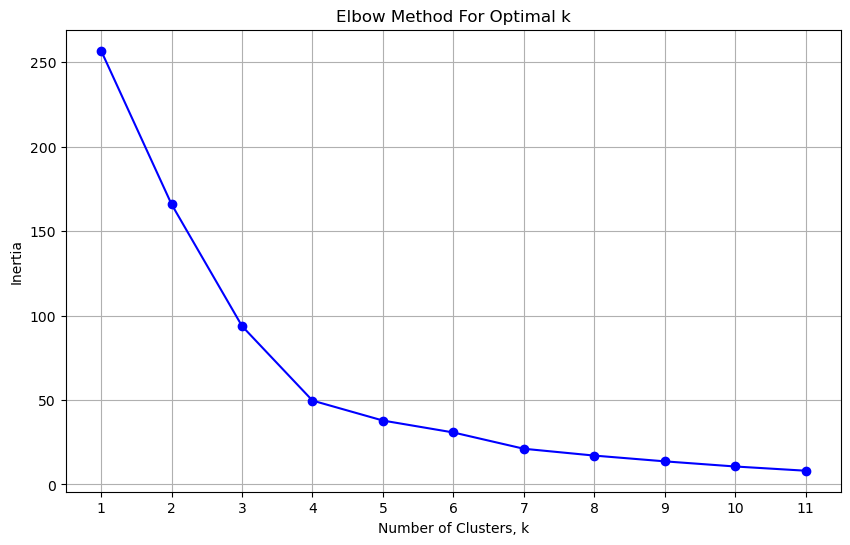

In [108]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['Number of Clusters'], df_elbow['Inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.xticks(df_elbow['Number of Clusters'])
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
  
  In graphing the PCA data, it seems like the "elbow" is also at k=4 or k=5, as after this point, the rate of decrease in inertia becomes more gradual.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
  
  While the "elbow" of each of these plots seems to be consistently around 4-5, the "elbow" of the PCA plot seems to be slightly more pronounced, suggesting a stronger preference for a specific number of clusters. This could imply that PCA has helped to clarify the structure within the data by reducing noise and redundancy. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [109]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [110]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

/Users/alisonlove/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [111]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans.labels_
# Print the resulting array of cluster values.
clusters

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)

In [116]:
# Create a copy of the DataFrame with the PCA data
pca_data = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_data['cluster'] = kmeans.labels_

# Display sample data
pca_data.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [113]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = pca_data.hvplot.scatter(
    x="PC1",
    y="PC2",
    by='cluster',  # Colors the points by the cluster labels
    hover_cols=['coin_id'],  # Adds cryptocurrency name to the hover tooltip
    title="Cryptocurrency Clusters using PCA"
)

scatter_plot

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

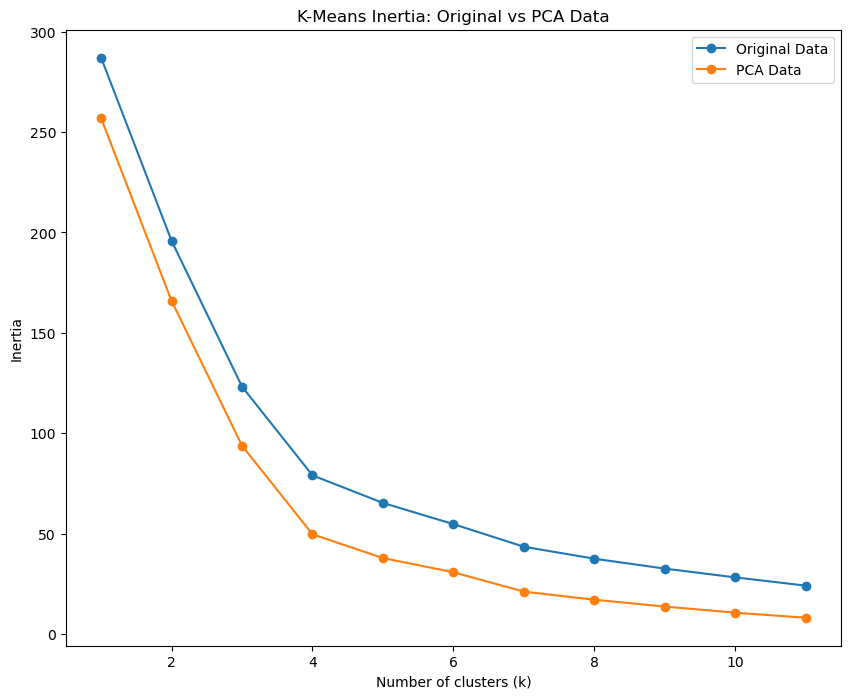

In [115]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(10, 8))

# Plotting the Elbow curve for the original data
plt.plot(k_values, original_inertia_values, '-o', label='Original Data')

# Plotting the Elbow curve for the PCA-transformed data
plt.plot(k_values, pca_inertia_values, '-o', label='PCA Data')

plt.title('K-Means Inertia: Original vs PCA Data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.show()

In [121]:
market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,2
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,2
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [122]:
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


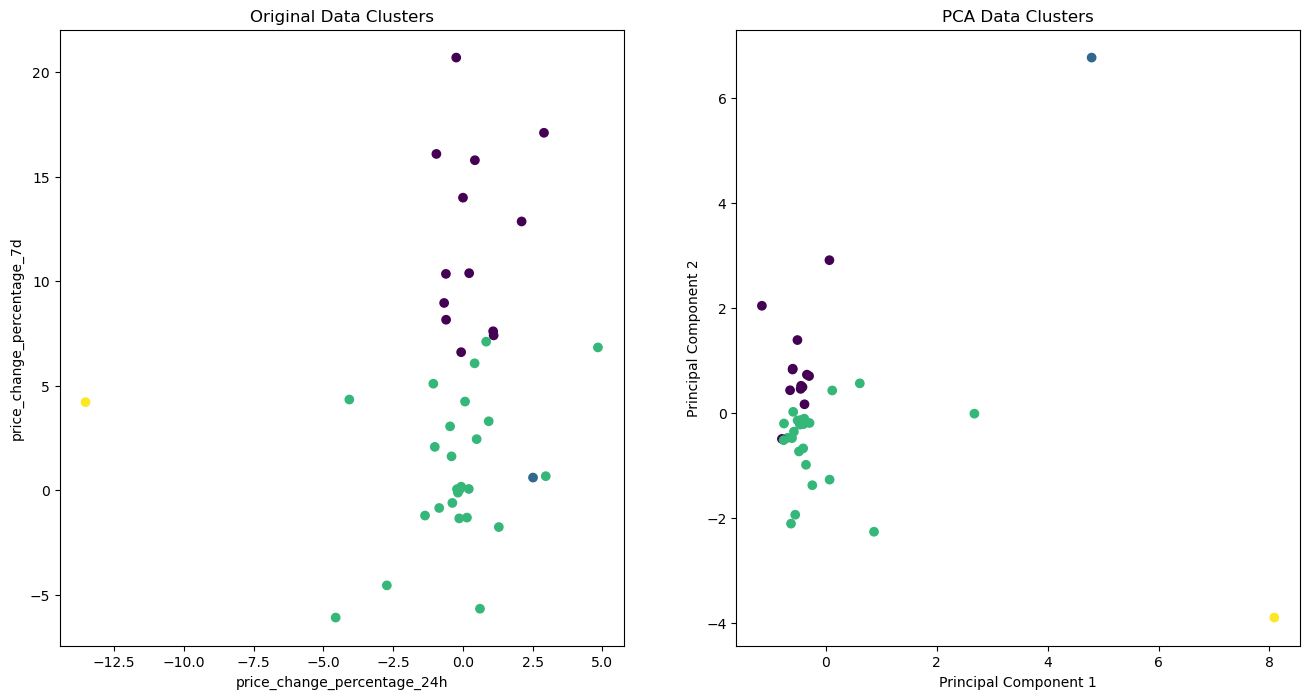

In [123]:
# Composite plot to contrast the clusters
# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Scatter plot for original data clusters
ax[0].scatter(market_data['price_change_percentage_24h'], market_data['price_change_percentage_7d'], c=market_data['cluster'], cmap='viridis', marker='o')
ax[0].set_title('Original Data Clusters')
ax[0].set_xlabel('price_change_percentage_24h')
ax[0].set_ylabel('price_change_percentage_7d')

# Scatter plot for PCA data clusters
ax[1].scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['cluster'], cmap='viridis', marker='o')
ax[1].set_title('PCA Data Clusters')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')

# Display the composite plot
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 

  After visually examining the cluster analysis results, it's evident that using fewer features via PCA before applying K-Means leads to a different cluster structure. This transformation with PCA can result in a more defined separation between clusters, as PCA reduces noise and redundancy by combining correlated features into principal components that represent the data's variability more effectively. Consequently, clusters may appear more distinct and less overlapped, which suggests that the data has underlying patterns that are more pronounced when viewed through the lens of principal components. However, while PCA can enhance the clustering process by simplifying the feature space, it can also obscure the direct relationship between the original features and the resulting clusters, making the interpretation less straightforward.